# Домашнее задание 7. Визуализация данных

Вся работа состоит из трех больших блоков:

- Базовые операции с датафреймами
- Вычисление новых признаков и группировка данных
- Визуализация данных

**Авторские подсказки**

Во многих заданиях вам даны авторские подсказки - результат выполнения авторского кода для решения этой задачи. Они вам даны просто для понимания, в правильном ли направлении вы идете. Формат вывода вашего кода не обязательно должен совпадать с форматом в подсказках. Ячейки с ответом изменять не рекомендуется - проводите эксперименты в новых.


# Описание задачи

**Задача кредитного скоринга** - одна из наиболее популярных областей в банковской индустрии, где применяется анализ данных

Признаки клиентов банка:

- ```age``` - возраст (вещественный)
- ```MonthlyIncome``` - месячный доход (вещественный)
- ```DebtRatio``` - Debt-to-income Ratio (вещественный)
- ```NumberOfOpenCreditLinesAndLoans``` - число заемов и кредитных линий
- ```NumberRealEstateLoansOrLines``` - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- ```NumberOfDependents``` - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- ```defaulted``` - выплачен или не выплачен в конечном итоге кредит заемщиком

В этой работе мы будем исследовать данные о заемщиках и научимся отвечать на вопросы о предоставленных нам данных.

# Базовые операции с датафреймами

## Задача 1 +

Скачайте набор данных:

In [ ]:
!gdown 1Y327Wvlw1GVY1SSTJ4g6DuTujCFc5TsH

Downloading...
From: https://drive.google.com/uc?id=1Y327Wvlw1GVY1SSTJ4g6DuTujCFc5TsH
To: /content/credit_data.csv
100% 4.55M/4.55M [00:00<00:00, 19.8MB/s]


Считайте файл ```credit_data.csv``` в переменную ```df```:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('credit_data.csv')

Определите размер таблицы:

In [ ]:
df.shape

(150000, 7)

```(150000, 7)```

Посмотрите первые пять строк:

In [ ]:
df.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


Выведите список названий столбцов:

In [ ]:
list(df.columns.values)

['defaulted',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

```
['defaulted',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']
 ```

## Задача 2 +

Определите число пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```sum```):

In [ ]:
df.isnull().sum()

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64


```
defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64
```



Определите долю пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```mean```):

In [ ]:
df.isnull().mean()

defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64

```
defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64
```

## Задача 3 +

Определите долю заемщиков, которые не выплатили кредит (колонка ```defaulted```):

In [ ]:
df.defaulted.mean()

0.06684

```0.06684```

## Задача 4 +

Определите количество заемщиков, у которых ежемесячный доход ```MonthlyIncome``` выше среднего:

In [ ]:
# в данной ситуации считаю длину датафрэйма, соответствующего условию
len(df[df.MonthlyIncome > df.MonthlyIncome.mean()])

44146

```44146```

## Задача 5 +

Вычислите медианный возраст заемщиков, которые не вернули кредит (```defaulted=1```):

In [ ]:
# отсеиваем тех, кто не вернул defaulted == 1
# вытягиваем столбец с возрастом у неплательщиков
# вычисляем медиану соответствующим методом
df[df['defaulted'] == 1].age.median()

45.0

```45.0```

Проверьте, больше ли он или меньше медианного возраста всех заемщиков:

In [ ]:
# возраст неплательщиков меньше
df.age.median() > df[df['defaulted'] == 1].age.median()

True

## Задача 6 +

Вычислите сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке:

In [ ]:
# получаем заемщиков старше 40
df40 = df[df['age'] > 40]

In [ ]:
# получаем средний ежемесячный доход по всей выборке
MI_mean = df.MonthlyIncome.mean()
MI_mean

6670.221237392844

In [ ]:
#Проиизводим сравнение и подсчет
(df40.MonthlyIncome > MI_mean).sum()

37629

```37629```

# Вычисление новых признаков и группировка данных

## Задача 7 +

Вычислите новый признак ```age_group``` на основе признака ```age```, который разбивает заемщиков на 3 возрастные группы:
- до 30 лет включительно (операция ```<=```) - **группа 1**
- от 30 лет не включительно и до 50 лет включительно - **группа 2**
- строго старше 50 лет - **группа 3**

Для этого заведите отдельную функцию `calculate_age_group` и передайте ее в метод `apply`, который позовете от столбца `age`:

In [ ]:
# создаю функцию calculate_age_group
def calculate_age_group(age):
  if age <= 30:
    return 'группа 1'
  elif 30 < age <= 50:
    return 'группа 2'
  else:
    return 'группа 3'

In [ ]:
# вычисляю новый признак
df['age_group'] = df.age.apply(calculate_age_group)

In [ ]:
# чекаю новый признак
df['age_group']

0         группа 2
1         группа 2
2         группа 2
3         группа 1
4         группа 2
            ...   
149995    группа 3
149996    группа 2
149997    группа 3
149998    группа 1
149999    группа 3
Name: age_group, Length: 150000, dtype: object

## Задача 8 +

Вычислите количество заемщиков в каждой группе нового вычисленного признака `age_group` с помощью метода `value_counts`:

In [ ]:
df.age_group.value_counts()

группа 3    79866
группа 2    59376
группа 1    10758
Name: age_group, dtype: int64

```
3    79866
2    59376
1    10758
Name: age_group, dtype: int64
```

## Задача 9 +

Посчитайте долю заемщиков, которые не вернули кредит, в каждой из вычисленных возрастных групп (группировка по возрастной группе и применение метода `mean` к колонке `defaulted`):

In [ ]:
df.groupby(df['age_group']).defaulted.mean()

age_group
группа 1    0.115635
группа 2    0.088975
группа 3    0.043811
Name: defaulted, dtype: float64

## Задача 10 +

Визуализируйте полученные данные в виде гистограммы. Добавьте сетку на график, дайте графику название:

In [ ]:
# это для удобства)
s = df.age_group.value_counts()
b = df.groupby(df['age_group']).defaulted.mean()

In [ ]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt

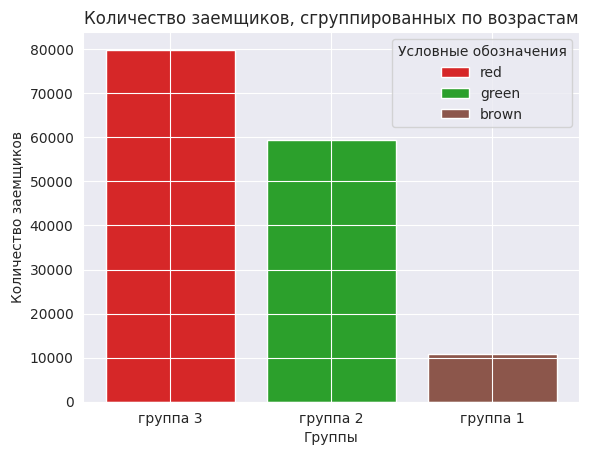

In [ ]:
fig, ax = plt.subplots()
groups = list(s.index)
counts = list(s.values)
bar_labels = ['red', 'green', 'brown']
bar_colors = ['tab:red', 'tab:green', 'tab:brown']

ax.bar(groups, counts, label=bar_labels, color=bar_colors)
# задаю название оси y
ax.set_ylabel('Количество заемщиков')
# задаю название оси x
ax.set_xlabel('Группы')
# задаю название данной гистограммы
ax.set_title('Количество заемщиков, сгруппированных по возрастам')
# даю имя легенде
ax.legend(title='Условные обозначения')

#создание сетки
ax.grid(True)

#вывожу график
plt.show()

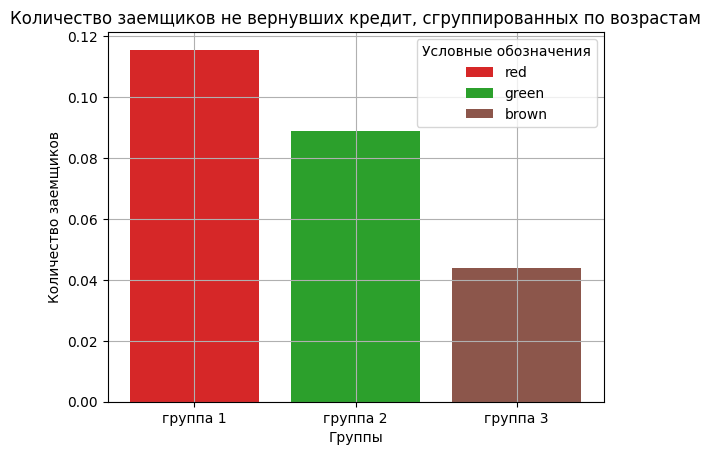

In [ ]:
fig, ax = plt.subplots()
groups = list(b.index)
counts = list(b.values)
bar_labels = ['red', 'green', 'brown']
bar_colors = ['tab:red', 'tab:green', 'tab:brown']

ax.bar(groups, counts, label=bar_labels, color=bar_colors)
# задаю название оси y
ax.set_ylabel('Количество заемщиков')
# задаю название оси x
ax.set_xlabel('Группы')
# задаю название данной гистограммы
ax.set_title('Количество заемщиков не вернувших кредит, сгруппированных по возрастам')
# даю имя легенде
ax.legend(title='Условные обозначения')

#создание сетки
ax.grid(True)

#вывожу график
plt.show()

## Задача 11 +

Какие выводы вы можете сделать? С увеличением возраста заемщика риск невозврата кредита становится больше или меньше? Дайте ответ на вопрос в текстовой ячейке ниже:

**Ответ: Чем старше заемщик, тем ниже риск невозврата кредита**

## Задача 12 +

Вычислите новый признак `alone_and_poor`, который равен `1` у заемщиков, которые не содержат никого, кроме себя (`NumberOfDependents == 0`) и у которых месячный доход (`MonthlyIncome`) меньше 10% квантили по этому признаку среди всех заемщиков. Иначе этот признак сделайте равным 0.

Для этого напишите функцию `calculate_alone_and_poor`, в которой вы будете принимать строку, доставать нужные поля у этой строки, и проверять перечисленные выше условия.

Заранее посчитайте значение 10% квантили по столбцу `MonthlyIncome`, и передайте это значение в функцию как аргумент по-умолчанию.

Затем полученную функцию примените ко всему датафрейму с помощью метода `apply`. Не забудьте указать параметр `axis=1` в методе `apply` (применять переданную функцию ко строкам), иначе код упадет с ошибкой.

In [ ]:
# заранее считаю 10% значение квантили для MonthlyIncome
MI_quant_10 = df.MonthlyIncome.quantile(.1)

In [ ]:
# создаю функцию calculate_alone_and_poor
def calculate_alone_and_poor(df_str, mi10=MI_quant_10):
  if df_str.NumberOfDependents == 0 and df_str.MonthlyIncome < mi10:
    return 1
  else:
    return 0

In [ ]:
df['alone_and_poor'] = df.apply(calculate_alone_and_poor, axis=1)

Сколько получилось людей с признаком ```alone_and_poor``` равным 1?

In [ ]:
# количество людей
df['alone_and_poor'].sum()

8719

# Визуализация данных

## Задача 13 +

Постройте гистограмму распределения возрастов всех заемщиков. Для этого вам может понадобиться метод `plot.hist()`. Обратите внимание, что у метода `hist()` есть параметр `bins`, который отвечает за мелкость разбиения гистограммы. Постройте два отдельных графика с параметрами `bins=10` и `bins=30`.

Подпишите оси, добавьте сетку на графики, дайте графикам название.

Также не забывайте, что чтобы картинка отрисовалась корректно, нужно последней строкой кода написать `plt.show()`.

In [ ]:
from matplotlib import pyplot as plt

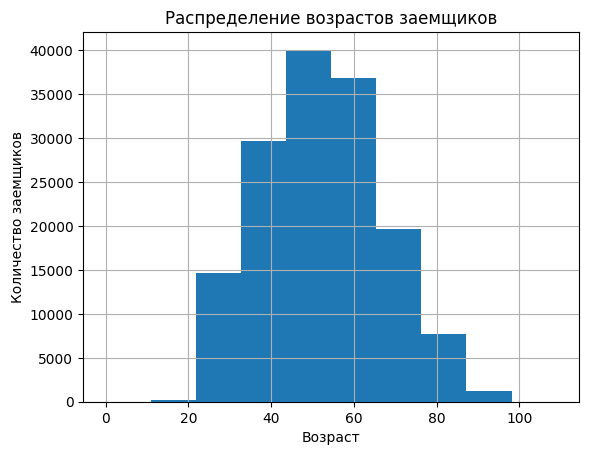

In [ ]:
plt.hist(df.age, bins=10)
# заголовок графика
plt.title('Распределение возрастов заемщиков')
# добавление осей
plt.grid()
# подпись осей
plt.ylabel('Количество заемщиков')
plt.xlabel('Возраст')

plt.show()

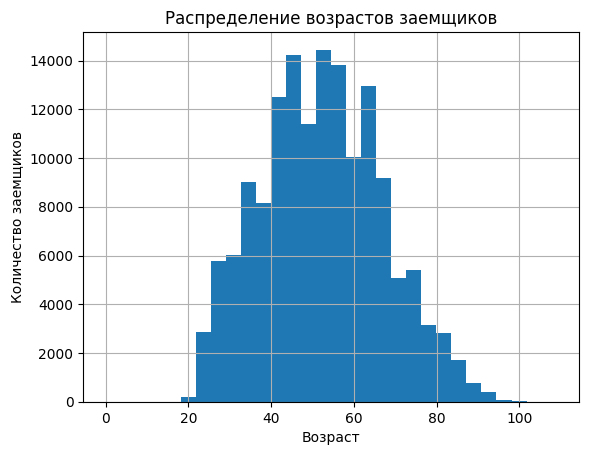

In [ ]:
plt.hist(df.age, bins=30)
# заголовок графика
plt.title('Распределение возрастов заемщиков')
# добавление осей
plt.grid()
# подпись осей
plt.ylabel('Количество заемщиков')
plt.xlabel('Возраст')

plt.show()

## Задача 14 +

Теперь постройте гистограмму распределения числа открытых кредитных линий (`NumberOfOpenCreditLinesAndLoans`) с помощью функции `distplot()` из модуля `seaborn`.

Подпишите оси, добавьте сетку на графики, дайте графику название:

In [ ]:
import seaborn as sns

<ipython-input-27-5f4c9361e5a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.NumberOfOpenCreditLinesAndLoans, bins=100, color='red')


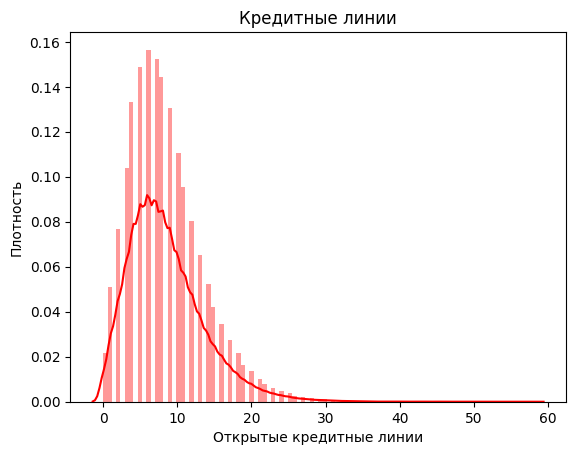

In [ ]:
ax = sns.distplot(df.NumberOfOpenCreditLinesAndLoans, bins=100, color='red')
sns.set_style("darkgrid", {'axes.axisbelow': False})

# меняю название осей
ax.set (xlabel='Открытые кредитные линии',
        ylabel='Плотность',
        title='Кредитные линии')

plt.show()

## Задача 15 +

Постройте гистограмму распределения признака `NumberOfDependents` для заемщиков, которые успешно вернули кредит (`defaulted = 0`).

Подпишите оси, добавьте сетку на графики, дайте графику название:

In [ ]:
# получаю заемщиков, вернувших кредит
data = df[df['defaulted'] == 0].NumberOfDependents

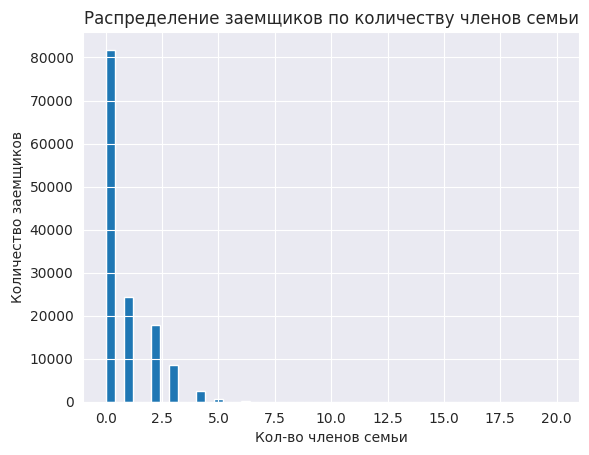

In [ ]:
# строю гистаграмму
plt.hist(data, bins=50)
# задаю название осям
plt.xlabel('Кол-во членов семьи')
plt.ylabel('Количество заемщиков')
# задаю название гистограммы
plt.title('Распределение заемщиков по количеству членов семьи')
# сетка осей
plt.grid(True)
# вывод графика
plt.show()

## Задача 16

Вычислите среднее значение признака `NumberOfDependents` для каждого возраста

---

(`groupby` по возрасту и `mean` от столбца `NumberOfDependents`) и постройте гистограмму распределения полученных значений (`plot.bar()`).

Сделайте график покрупнее, например 14 на 10 дюймов с помощью параметра `figsize`.

Подпишите оси, добавьте сетку на графики, дайте графику название.

NumberOfDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)

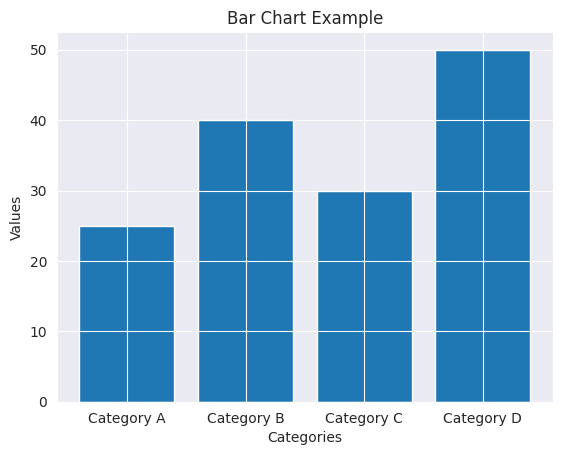

In [ ]:
# пример использования plt.bar() это для меня, чтобы разобраться что не так

import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 50]

# Creating a bar chart
plt.bar(categories, values)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Displaying the chart
plt.show()

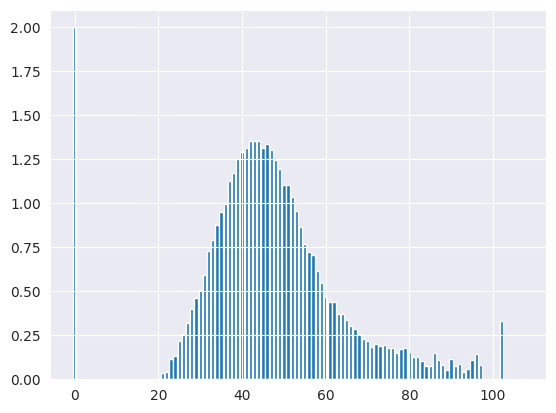

<Figure size 1400x1000 with 0 Axes>

In [ ]:
# разбивка количества иждевенцев по возрастам людей
plt.bar(df.groupby(df['age']).NumberOfDependents.mean().index, df.groupby('age')['NumberOfDependents'].mean())
fig = plt.figure(figsize=(14, 10))
plt.show()

## Задача 17

Видите ли вы теперь какие-то аномалии в данных? Определите, что это за аномалии, и очистите данные от этих аномалий. Затем снова постройте такой же график, как в предыдущем задании, только уже на датафрейме с очищенными выбросами:

После того, как построил график, то все встало на свои места.
Ну, разумеется выбросами у нас являются те, кто или не указал возраст или чей возраст равен 0.

Так же у нас по идее есть товарищи, которым за 100 лет, и у них на иждевение есть родственники. Очень сильно сомневаюсь, что это ребятки из семьи Рокфеллеров =)

Остальные возраста меня не смущают. Если эти данные по РФ, то вообще не удивлен, что у людей, которые 80+ есть дети на иждевение. Лично знаю одну женщину 75+, которая воспитывает двоих внуков.

In [ ]:
# узнаем у кого же, возраст равен нулю)
df[df['age'] == 0]

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
65695,0,0,0.436927,6000.0,6,2,2.0


In [ ]:
# теперь посмотрим на того, кто старше 100 и имеет не иждевении ребенка
df[(df['age'] > 100) & (df['NumberOfDependents'] > 0)]

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
96450,0,102,0.273844,3417.0,7,0,1.0


In [ ]:
# можно, конечно удалять значения, с помощью дропов, но, я наткнулся ну инфу
# о том, что это может быть дольше, чем через присвоение датасету самого себя,
# отфильтрованного по условиям)
# поэтому я создам новый датафрейм, в котором будут исключительно люди старше 0 и младше 100 лет
df_NOD = df[(df['age'] < 100) & (df['age'] > 0)]

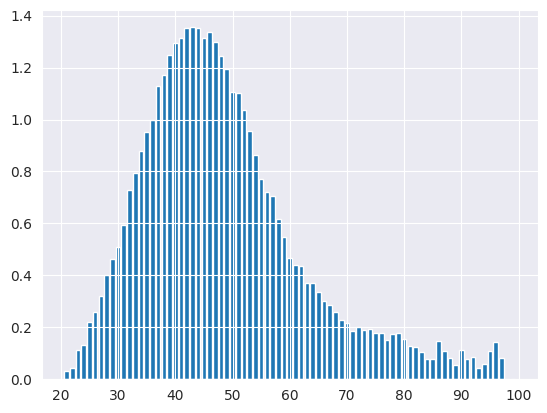

<Figure size 1400x1000 with 0 Axes>

In [ ]:
plt.bar(df.groupby(df_NOD['age']).NumberOfDependents.mean().index, df_NOD.groupby('age')['NumberOfDependents'].mean())
fig = plt.figure(figsize=(14, 10))
plt.show()